# Proyek Analisis Data: E-Commerce Dataset
- **Nama:** Josuanstya Lovdianchel
- **Email:** josuanstya@gmail.com
- **ID Dicoding:** lovdianchel

## Menentukan Pertanyaan Bisnis

- Produk (kategori) apa yang paling sering terjual?
- Produk apa yang pernah terjual dengan nilai tertinggi?
- Apa kata-kata yang paling sering muncul pada review?
- Bagaimana persebaran lokasi geografis pembeli?
- Bagaimana tren penjualan dari waktu ke waktu?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Data Wrangling

### Gathering Data

In [2]:
#Product
product_category_df = pd.read_csv('product_category_name_translation.csv')
product_df = pd.read_csv('products_dataset.csv')

#Customer
customer_df = pd.read_csv('customers_dataset.csv')

#Order Related Things
order_items_df = pd.read_csv('order_items_dataset.csv')
order_payments_df = pd.read_csv('order_payments_dataset.csv')
order_df = pd.read_csv('orders_dataset.csv')
order_reviews_df = pd.read_csv('order_reviews_dataset.csv')

### Assessing Data

In [3]:
#Cek tabel info
dfs = {
    'product_category_df': product_category_df,
    'product_df': product_df,
    'customer_df': customer_df,
    'order_items_df': order_items_df,
    'order_payments_df': order_payments_df,
    'order_df': order_df,
    'order_reviews_df': order_reviews_df
}

# Loop untuk mengecek tabel info
for name, df in dfs.items():
    data_info = df.info()
    print(f"{name}:{data_info}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
product_category_df:None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm          

In [4]:
#Cek isi data

# Loop untuk mengecek isi data
for name, df in dfs.items():
    data_head = df.head(3)
    print(f"{name}:\n{data_head}\n")

product_category_df:
    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto

product_df:
                         product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                 artes   
2  96bd76ec8810374ed1b65e291975717f         esporte_lazer   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0      

####Cek Kondisi Data

In [5]:
#Cek tabel yang terduplikasi

# Loop untuk mengecek jumlah duplikasi
for name, df in dfs.items():
    duplikat_count = df.duplicated().sum()
    print(f"Jumlah data duplikasi untuk {name}: {duplikat_count}")

Jumlah data duplikasi untuk product_category_df: 0
Jumlah data duplikasi untuk product_df: 0
Jumlah data duplikasi untuk customer_df: 0
Jumlah data duplikasi untuk order_items_df: 0
Jumlah data duplikasi untuk order_payments_df: 0
Jumlah data duplikasi untuk order_df: 0
Jumlah data duplikasi untuk order_reviews_df: 0


In [6]:
#Cek tabel yang kosong

# Loop untuk mengecek jumlah kosong
for name, df in dfs.items():
    kosong_count = df.isna().sum()
    jumlah_row = len(df)
    print(f"Jumlah data kosong untuk {name}: \n{kosong_count}")
    print(f"Jumlah row: {jumlah_row}\n")

Jumlah data kosong untuk product_category_df: 
product_category_name            0
product_category_name_english    0
dtype: int64
Jumlah row: 71

Jumlah data kosong untuk product_df: 
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
Jumlah row: 32951

Jumlah data kosong untuk customer_df: 
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Jumlah row: 99441

Jumlah data kosong untuk order_items_df: 
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Jumlah row: 112650

Jumlah 

**Null Data**
product_category_df: No Null

- product_df: **610** Null
- customer_df: No Null
- geolocation_df: No Null
- order_items_df: No null
- order_payments_df: No Null
- order_df: **2965** Null
- order_reviews_df: **87656** Null
- seller_df: No Null




In [7]:
#Cek kolom yang sama untuk connecting the dots

# Mengumpulkan semua nama kolom
all_columns = []
for name, df in dfs.items():
    all_columns.extend(df.columns.tolist())

# Mencari kolom yang duplikat
duplicate_columns = pd.Series(all_columns).value_counts()
duplicate_columns = duplicate_columns[duplicate_columns > 1].index.tolist()

print("Kolom yang kembar di antara tabel-tabel:")
print(duplicate_columns)

Kolom yang kembar di antara tabel-tabel:
['order_id', 'product_id', 'product_category_name', 'customer_id']


### Cleaning Data

To Do List Data Cleaning


- Ganti kolom product_category_name pada tabel product_df dengan bahasa Inggris (dari kolom product_category_name_english tabel product_category_df)
- Hapus kolom product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm dari tabel product_df (karena tidak diperlukan)
- Hapus/perbaiki data null pada masing-masing tabel
- Ubah geolocation_lng pada tabel geolocation_df menjadi float64 (tidak jadi karena data tidak terpakai)
- Ubah format datetime pada semua tabel


In [8]:
#Memperbaiki product_df

#Mengubah kolom product_category_name menjadi bahasa Inggris
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
product_category_df.nunique()

,0
product_category_name,71
product_category_name_english,71


In [10]:
# Buat dictionary untuk pemetaan
mapping = dict(zip(product_category_df['product_category_name'], product_category_df['product_category_name_english']))

# Gunakan replace untuk mengganti nilai
product_df['product_category_name'].replace(mapping, inplace=True)

<ipython-input-10-1c06a5ae8bf9>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  product_df['product_category_name'].replace(mapping, inplace=True)


In [11]:
product_df.product_category_name.nunique()

73

In [12]:
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Terdapat 73 data unique. Sedangkan pada kolom product_category_name_english hanya terdapat 71 kategori.

In [13]:
#Melakukan pengecekan untuk nama produk, apakah semua nama sudah berbahasa Inggris

def get_unique_values(data_list):
  unique_values = []
  for value in data_list:
    if value not in unique_values:
      unique_values.append(value)
      print(value)

get_unique_values(product_df['product_category_name'])

perfumery
art
sports_leisure
baby
housewares
musical_instruments
cool_stuff
furniture_decor
home_appliances
toys
bed_bath_table
construction_tools_safety
computers_accessories
health_beauty
luggage_accessories
garden_tools
office_furniture
auto
electronics
fashion_shoes
telephony
stationery
fashion_bags_accessories
computers
home_construction
watches_gifts
construction_tools_construction
pet_shop
small_appliances
agro_industry_and_commerce
nan
furniture_living_room
signaling_and_security
air_conditioning
consoles_games
books_general_interest
costruction_tools_tools
fashion_underwear_beach
fashion_male_clothing
kitchen_dining_laundry_garden_furniture
industry_commerce_and_business
fixed_telephony
construction_tools_lights
books_technical
home_appliances_2
party_supplies
drinks
market_place
la_cuisine
costruction_tools_garden
fashio_female_clothing
home_confort
audio
food_drink
music
food
tablets_printing_image
books_imported
small_appliances_home_oven_and_coffee
fashion_sport
christmas_

Masih ada beberapa product_category_name yang memiliki bahasa Portugis:
*   portateis_cozinha_e_preparadores_de_alimentos
*   la_cuisine

Terjemahannya:
*  portable_kitchen_food_preparers
*  kitchen






In [14]:
#Melakukan terjemahan secara manual
product_df['product_category_name'].replace('portateis_cozinha_e_preparadores_de_alimentos', 'portable_kitchen_food_preparers', inplace=True)
product_df['product_category_name'].replace('la_cuisine', 'kitchen', inplace=True)


In [15]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [16]:
#Menghapus kolom yang tidak digunakan
product_df = product_df[['product_id','product_category_name']]

In [17]:
product_df.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


In [18]:
product_df.isna().sum()

,0
product_id,0
product_category_name,610


In [19]:
#Mengisi kolom null dengan 'Unknown'
product_df.fillna('Unknown', inplace=True)

<ipython-input-19-b062833550f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df.fillna('Unknown', inplace=True)


In [20]:
#Memperbaiki data Order
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [21]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  order_df[column] = pd.to_datetime(order_df[column])

In [22]:
#Masih banyak data kosong pada date
order_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [23]:
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [24]:
order_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99281,97658,96476,99441
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [25]:
#Berdasarkan analisis yang saya lakukan, untuk mengisi nilai missing pada order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, saya akan mengira-ngira berdasarkan nilai mean dari kolom yang masih lengkap, yaitu order_purchase_timestamp dan order_estimated_delivery_date

#Mencari rata-rata lama waktu order_approved_time
order_approved_time = order_df.order_approved_at.mean() - order_df.order_purchase_timestamp.mean()
print("Order approved time: ", order_approved_time)

#Mencari rata-rata lama waktu pengiriman setelah pemesanan dikonfirmasi
delivery_after_order_confirmed = order_df.order_delivered_carrier_date.mean() - order_df.order_approved_at.mean()
print("Delivery time after order confirmed: ", delivery_after_order_confirmed)

#Mencari rata-rata lama waktu pengiriman (pesanan sampai ke konsumen)
delivery_time = order_df.order_delivered_customer_date.mean() - order_df.order_delivered_carrier_date.mean()
print("Delivery time: ", delivery_time)

#Mencari rata-rata perbedaan lama waktu pengiriman dengan yang diestimasikan
delivery_estimated_time = order_df.order_estimated_delivery_date.mean() - order_df.order_delivered_customer_date.mean()
print("Estimated delivery time (delta):", delivery_estimated_time)

Order approved time:  0 days 09:52:11.322219008
Delivery time after order confirmed:  4 days 03:14:24.039478528
Delivery time:  9 days 14:19:30.897263616
Estimated delivery time (delta): 9 days 14:59:18.694568960


In [26]:
#Memperbaiki data time untuk analisis time series

order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])

# Rata-rata waktu yang diberikan untuk setiap kolom (dalam format timedelta)
order_approved_avg = pd.Timedelta(days=0, hours=9, minutes=52, seconds=11, microseconds=322219)
delivery_after_confirm_avg = pd.Timedelta(days=4, hours=3, minutes=14, seconds=24, microseconds=394785)
delivery_time_avg = pd.Timedelta(days=9, hours=14, minutes=19, seconds=30, microseconds=897264)
estimated_delivery_avg = pd.Timedelta(days=9, hours=14, minutes=59, seconds=18, microseconds=694569)

# Fungsi untuk mengisi nilai NaN dengan menambahkan rata-rata durasi ke order_purchase_timestamp
def fill_na_with_avg_duration(df, column_name, average_duration):
    df[column_name] = df.apply(
        lambda row: row['order_purchase_timestamp'] + average_duration if pd.isna(row[column_name]) else row[column_name],
        axis=1
    )

# Mengisi nilai NaN di setiap kolom dengan menambahkan durasi rata-rata
fill_na_with_avg_duration(order_df, 'order_approved_at', order_approved_avg)
fill_na_with_avg_duration(order_df, 'order_delivered_carrier_date', delivery_after_confirm_avg)
fill_na_with_avg_duration(order_df, 'order_delivered_customer_date', delivery_time_avg)
fill_na_with_avg_duration(order_df, 'order_estimated_delivery_date', estimated_delivery_avg)

# Menampilkan hasil setelah fillna
print(order_df[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']].head())


  order_purchase_timestamp   order_approved_at order_delivered_carrier_date  \
0      2017-10-02 10:56:33 2017-10-02 11:07:15          2017-10-04 19:55:00   
1      2018-07-24 20:41:37 2018-07-26 03:24:27          2018-07-26 14:31:00   
2      2018-08-08 08:38:49 2018-08-08 08:55:23          2018-08-08 13:50:00   
3      2017-11-18 19:28:06 2017-11-18 19:45:59          2017-11-22 13:39:59   
4      2018-02-13 21:18:39 2018-02-13 22:20:29          2018-02-14 19:46:34   

  order_delivered_customer_date order_estimated_delivery_date  
0           2017-10-10 21:25:13                    2017-10-18  
1           2018-08-07 15:27:45                    2018-08-13  
2           2018-08-17 18:06:29                    2018-09-04  
3           2017-12-02 00:28:42                    2017-12-15  
4           2018-02-16 18:17:02                    2018-02-26  


In [27]:
# Cek kolom kosong pada date

order_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


## Exploratory Data Analysis (EDA)

### Mencari tau produk yang paling banyak terjual

In [28]:
#Menjawab Pertanyaan 1: Produk (kategori) apa yang paling sering terjual?
product_df.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


In [29]:
#Menggabungkan dua dataset order yang memiliki kemiripan, yaitu 'orders_dataset' dan 'order_items_dataset'

orders_dfs = pd.merge(
    left=order_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

orders_dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   customer_id                    113425 non-null  object        
 2   order_status                   113425 non-null  object        
 3   order_purchase_timestamp       113425 non-null  datetime64[ns]
 4   order_approved_at              113425 non-null  datetime64[ns]
 5   order_delivered_carrier_date   113425 non-null  datetime64[ns]
 6   order_delivered_customer_date  113425 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113425 non-null  datetime64[ns]
 8   order_item_id                  112650 non-null  float64       
 9   product_id                     112650 non-null  object        
 10  seller_id                      112650 non-null  object        
 11  

In [30]:
#Menggabungkan dataset orders_df dengan product untuk mencari tahu produk yang paling banyak terjual
product_orders_dfs = pd.merge(
    left=orders_dfs,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

product_orders_dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   customer_id                    113425 non-null  object        
 2   order_status                   113425 non-null  object        
 3   order_purchase_timestamp       113425 non-null  datetime64[ns]
 4   order_approved_at              113425 non-null  datetime64[ns]
 5   order_delivered_carrier_date   113425 non-null  datetime64[ns]
 6   order_delivered_customer_date  113425 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113425 non-null  datetime64[ns]
 8   order_item_id                  112650 non-null  float64       
 9   product_id                     112650 non-null  object        
 10  seller_id                      112650 non-null  object        
 11  

In [31]:
#Menampilkan produk dengan jumlah pesanan terbanyak dan tersedikit (dihitung dari order id)

product_orders_dfs.groupby(by='product_category_name').nunique().sort_values(by=product_orders_dfs.columns[0], ascending=False)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
product_category_name,,,,,,,,,,,,,,
bed_bath_table,9417,9417,5,9383,9308,8023,9398,402,11,3029,196,9409,871,2223
health_beauty,8836,8836,5,8809,8734,7749,8825,417,21,2444,492,8801,1263,2149
sports_leisure,7720,7720,5,7690,7634,7268,7714,413,7,2867,481,7668,1139,2196
computers_accessories,6689,6689,6,6673,6615,6005,6682,404,20,1639,287,6676,1003,1778
furniture_decor,6449,6449,5,6431,6404,6005,6446,417,15,2657,370,6449,788,2106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kitchen,13,13,1,13,13,13,13,13,2,10,2,13,12,13
cds_dvds_musicals,12,12,1,12,12,11,12,12,2,1,1,12,2,3
fashion_childrens_clothes,8,8,2,8,8,8,8,8,1,5,4,8,4,8


### Mencari tau produk dengan nilai transaksi paling besar

In [32]:
#Menjawab Pertanyaan 2: Nilai transaksi paling besar

#Cek nilai transaksi paling besar
order_payments_df['payment_value'].max()

13664.08

In [33]:
#Menggabungkan df payment dengan order gabungan sebelumnya untuk mendapatkan informasi yang lebih lengkap

payment_orders_dfs = pd.merge(
    left=product_orders_dfs,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

payment_orders_dfs.sort_values(by='payment_value', ascending=False).head(20)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,payment_sequential,payment_type,payment_installments,payment_value
15822,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,3.0,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,fixed_telephony,1.0,credit_card,1.0,13664.08
15821,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,2.0,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,fixed_telephony,1.0,credit_card,1.0,13664.08
15825,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,6.0,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,fixed_telephony,1.0,credit_card,1.0,13664.08
15824,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,5.0,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,fixed_telephony,1.0,credit_card,1.0,13664.08
15826,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,7.0,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,fixed_telephony,1.0,credit_card,1.0,13664.08
15823,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,4.0,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,fixed_telephony,1.0,credit_card,1.0,13664.08
15827,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,8.0,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,fixed_telephony,1.0,credit_card,1.0,13664.08
15820,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,1.0,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,fixed_telephony,1.0,credit_card,1.0,13664.08
79198,736e1922ae60d0d6a89247b851902527,ec5b2ba62e574342386871631fafd3fc,delivered,2018-07-15 14:49:44,2018-07-17 04:31:36,2018-07-20 13:09:00,2018-07-26 22:03:06,2018-08-02,4.0,19936fa4f614ee0590d3b77ac83fd648,b37c4c02bda3161a7546a4e6d222d5b2,2018-07-23 04:31:36,1790.0,28.72,fixed_telephony,1.0,boleto,1.0,7274.88
79195,736e1922ae60d0d6a89247b851902527,ec5b2ba62e574342386871631fafd3fc,delivered,2018-07-15 14:49:44,2018-07-17 04:31:36,2018-07-20 13:09:00,2018-07-26 22:03:06,2018-08-02,1.0,19936fa4f614ee0590d3b77ac83fd648,b37c4c02bda3161a7546a4e6d222d5b2,2018-07-23 04:31:36,1790.0,28.72,fixed_telephony,1.0,boleto,1.0,7274.88


In [34]:
# Mencari produk dengan total payment value terbesar
# Sebenarnya analisis ini bisa digabung dengan nomor 1, tetapi terlanjur jadi dipisah saja :D

payment_orders_dfs.groupby('product_category_name').agg({
    'payment_value': 'sum'
}).sort_values(by='payment_value', ascending=False)

,payment_value
product_category_name,
bed_bath_table,1712553.67
health_beauty,1657373.12
computers_accessories,1585330.45
furniture_decor,1430176.39
watches_gifts,1429216.68
...,...
pc_gamer,2174.43
home_comfort_2,1710.54
cds_dvds_musicals,1199.43


### Mencari tau kata-kata yang paling sering muncul di review

In [35]:
#Menjawab Pertanyaan 3: Kata-kata yang paling sering muncul di review

order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


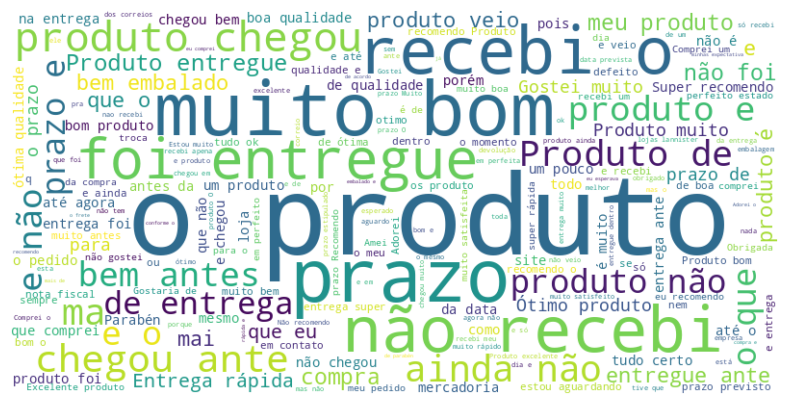

In [36]:
# Menggabungkan semua komentar review dari kolom 'review_comment_message'
text = ' '.join(order_reviews_df['review_comment_message'].dropna())

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan word cloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menonaktifkan sumbu
plt.show()


In [37]:
#Kata-kata yang sering muncul: produto, nao recebi, foi entregue, prazo, muito bom, chegou ante
#Kata-kata yang sering muncul (Indonesia): produk, saya tidak menerimanya, sudah dikirim, batas waktu, sangat bagus, tiba sebelum

### Mencari tau kota dengan jumlah konsumen paling banyak

In [38]:
#Menjawab Pertanyaan 4: Persebaran konsumen, payment value, dan info lainnya berdasarkan state dan city

df = pd.merge(payment_orders_dfs, customer_df)

df.groupby('customer_state')['payment_value'].sum().sort_values(ascending=False)

#PR: Nanti tambahin jumlah count id nya, jumlah orderannya, jumlah customer, dll

,payment_value
customer_state,
SP,7673188.55
RJ,2783724.26
MG,2341861.47
RS,1152019.17
PR,1074614.19
BA,802416.72
SC,799135.92
GO,516182.51
DF,434512.55


In [39]:
# Menggunakan groupby dengan beberapa agregasi
df.groupby('customer_state').agg(
    total_payment_value=('payment_value', 'sum'),  # Total pembayaran per state
    total_orders=('order_id', 'count'),  # Jumlah pesanan per state
    total_customers=('customer_unique_id', 'nunique'),  # Jumlah pelanggan unik per state
    average_payment_value=('payment_value', 'mean'),  # Rata-rata pembayaran per order
).sort_values(by='total_payment_value', ascending=False)


,total_payment_value,total_orders,total_customers,average_payment_value
customer_state,,,,
SP,7673188.55,49967,40302,153.574345
RJ,2783724.26,15420,12384,180.526865
MG,2341861.47,13738,11259,170.465968
RS,1152019.17,6521,5277,176.662961
PR,1074614.19,6017,4882,178.596342
BA,802416.72,4071,3277,197.105556
SC,799135.92,4328,3534,184.643235
GO,516182.51,2443,1952,211.290426
DF,434512.55,2489,2075,174.573142


In [40]:
df.groupby('customer_city').agg(
    total_payment_value=('payment_value', 'sum'),  # Total pembayaran per state
    total_orders=('order_id', 'count'),  # Jumlah pesanan per state
    total_customers=('customer_unique_id', 'nunique'),  # Jumlah pelanggan unik per state
    average_payment_value=('payment_value', 'mean'),  # Rata-rata pembayaran per order
).sort_values(by='total_payment_value', ascending=False)


,total_payment_value,total_orders,total_customers,average_payment_value
customer_city,,,,
sao paulo,2872846.47,18738,14984,153.316601
rio de janeiro,1574144.72,8252,6620,190.759176
belo horizonte,506192.87,3272,2672,154.704422
brasilia,432388.25,2473,2069,174.843611
curitiba,331851.61,1820,1465,182.336049
...,...,...,...,...
santo antonio do rio abaixo,24.23,1,1,24.230000
tamboara,24.09,1,1,24.090000
jenipapo de minas,22.58,1,1,22.580000


### Mencari tahu tren penjualan

<ipython-input-41-6882bcd2621b>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders_per_month = df.resample('M').size()
<ipython-input-41-6882bcd2621b>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_per_month = df['payment_value'].resample('M').sum()
<ipython-input-41-6882bcd2621b>:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  delivery_vs_estimated = df['delivery_actual_vs_estimated'].resample('M').mean()
<ipython-input-41-6882bcd2621b>:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  order_status_per_month = df.groupby([pd.Grouper(freq='M'), 'order_status']).size().unstack().fillna(0)


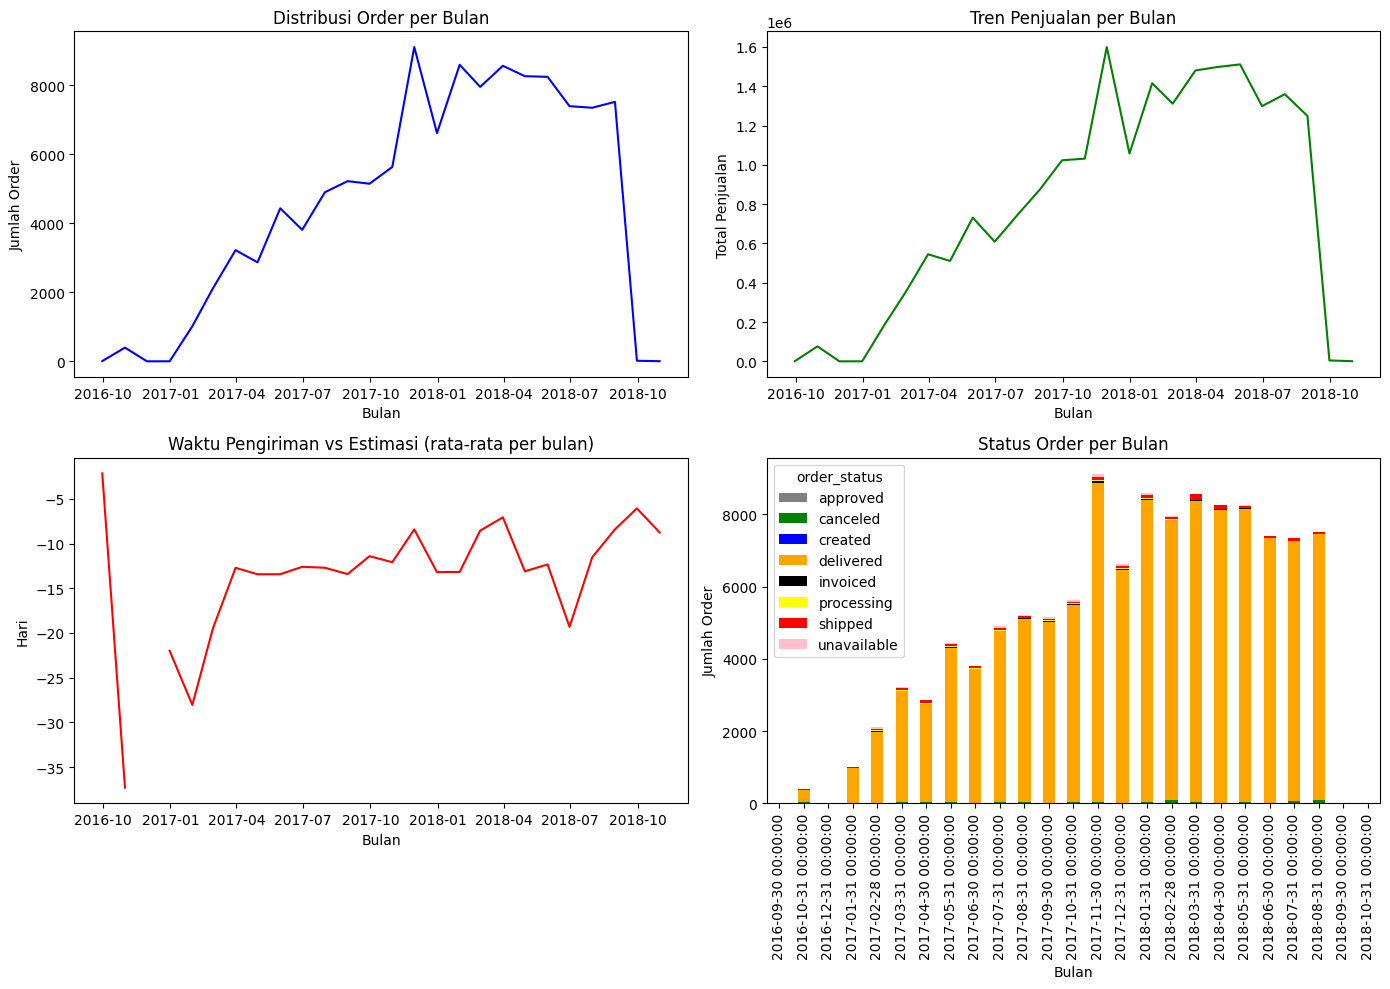

In [41]:
# Menjawab pertanyaan 5: Tren penjualan

# Memastikan 'order_purchase_timestamp' adalah tipe datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Mengatur indeks DataFrame ke kolom 'order_purchase_timestamp'
df.set_index('order_purchase_timestamp', inplace=True)

# 1. **Distribusi Order per Waktu (per bulan)**
orders_per_month = df.resample('M').size()

# 2. **Tren Penjualan per Bulan**
# Menjumlahkan 'payment_value' per bulan
sales_per_month = df['payment_value'].resample('M').sum()

# 3. **Waktu Pengiriman vs Estimasi**
# Menghitung perbedaan antara pengiriman aktual dan estimasi
df['delivery_actual_vs_estimated'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

# Menghitung rata-rata per bulan
delivery_vs_estimated = df['delivery_actual_vs_estimated'].resample('M').mean()

# 4. **Status Order per Waktu**
# Membandingkan status order per bulan
order_status_per_month = df.groupby([pd.Grouper(freq='M'), 'order_status']).size().unstack().fillna(0)

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Distribusi Order per Bulan
axes[0, 0].plot(orders_per_month, color='b', label='Jumlah Order')
axes[0, 0].set_title('Distribusi Order per Bulan')
axes[0, 0].set_xlabel('Bulan')
axes[0, 0].set_ylabel('Jumlah Order')

# Plot 2: Tren Penjualan per Bulan
axes[0, 1].plot(sales_per_month, color='g', label='Total Penjualan (payment_value)')
axes[0, 1].set_title('Tren Penjualan per Bulan')
axes[0, 1].set_xlabel('Bulan')
axes[0, 1].set_ylabel('Total Penjualan')

# Plot 3: Waktu Pengiriman vs Estimasi
axes[1, 0].plot(delivery_vs_estimated, color='r', label='Waktu Pengiriman vs Estimasi')
axes[1, 0].set_title('Waktu Pengiriman vs Estimasi (rata-rata per bulan)')
axes[1, 0].set_xlabel('Bulan')
axes[1, 0].set_ylabel('Hari')

# Plot 4: Status Order per Bulan
order_status_per_month.plot(kind='bar', stacked=True, ax=axes[1, 1], color=['gray', 'green', 'blue', 'orange', 'black', 'yellow', 'red', 'pink'])
axes[1, 1].set_title('Status Order per Bulan')
axes[1, 1].set_xlabel('Bulan')
axes[1, 1].set_ylabel('Jumlah Order')

# Menampilkan semua plot
plt.tight_layout()
plt.show()

In [42]:
payment_orders_dfs

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumery,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,auto,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,baby,1.0,credit_card,3.0,195.00
118430,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,home_appliances_2,1.0,credit_card,5.0,271.01
118431,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,computers_accessories,1.0,credit_card,4.0,441.16
118432,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,computers_accessories,1.0,credit_card,4.0,441.16


### Mencari tahu RFM

In [43]:
# RFM
customer_id_mapping = {customer_id: i +1 for i, customer_id in enumerate(df['customer_id'].unique())}
df['id'] = df['customer_id'].map(customer_id_mapping)

rfm_df = df.groupby(by='id', as_index=False).agg({
    "order_approved_at": "max",
    "order_id": "nunique",
    "payment_value": "sum"
})

rfm_df.columns = ['customer_id', 'max_order_timestamp', 'frequency', 'monetary']
rfm_df['max_order_timestamp'] = pd.to_datetime(rfm_df['max_order_timestamp'])
recent_date = pd.to_datetime(df['order_approved_at']).max()
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)

rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,1,2017-10-02 11:07:15,1,38.71,380
1,2,2018-07-26 03:24:27,1,141.46,83
2,3,2018-08-08 08:55:23,1,179.12,70
3,4,2017-11-18 19:45:59,1,72.20,333
4,5,2018-02-13 22:20:29,1,28.62,246


<ipython-input-44-090d92527557>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(
<ipython-input-44-090d92527557>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(
<ipython-input-44-090d92527557>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(


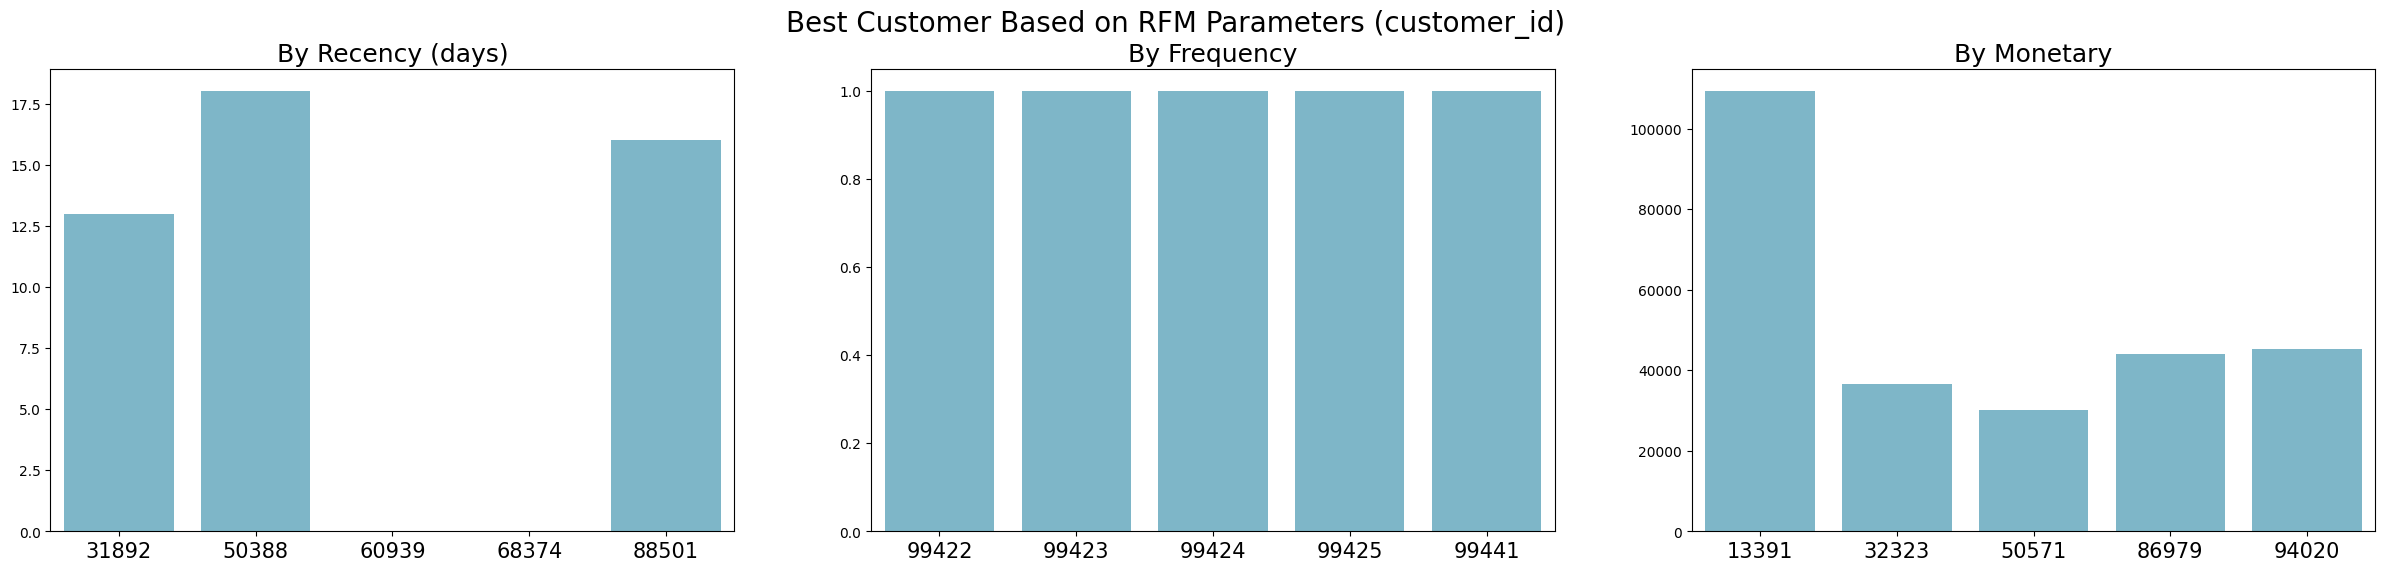

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(
    by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(
    by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(
    by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:Produk (kategori) apa yang paling sering terjual?

In [45]:
df_product_category_count_by_order = df.groupby('product_category_name')['order_id'].nunique().sort_values(ascending=False).reset_index()
print(df_product_category_count_by_order)

        product_category_name  order_id
0              bed_bath_table      9417
1               health_beauty      8836
2              sports_leisure      7720
3       computers_accessories      6689
4             furniture_decor      6449
..                        ...       ...
69                    kitchen        13
70          cds_dvds_musicals        12
71  fashion_childrens_clothes         8
72                   pc_gamer         8
73      security_and_services         2

[74 rows x 2 columns]


<ipython-input-46-d945cb173f1a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="order_id", x="product_category_name", data=df_product_category_count_by_order.head(5), palette=colors, ax=ax[0])
<ipython-input-46-d945cb173f1a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="order_id", x="product_category_name", data=df_product_category_count_by_order.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1])


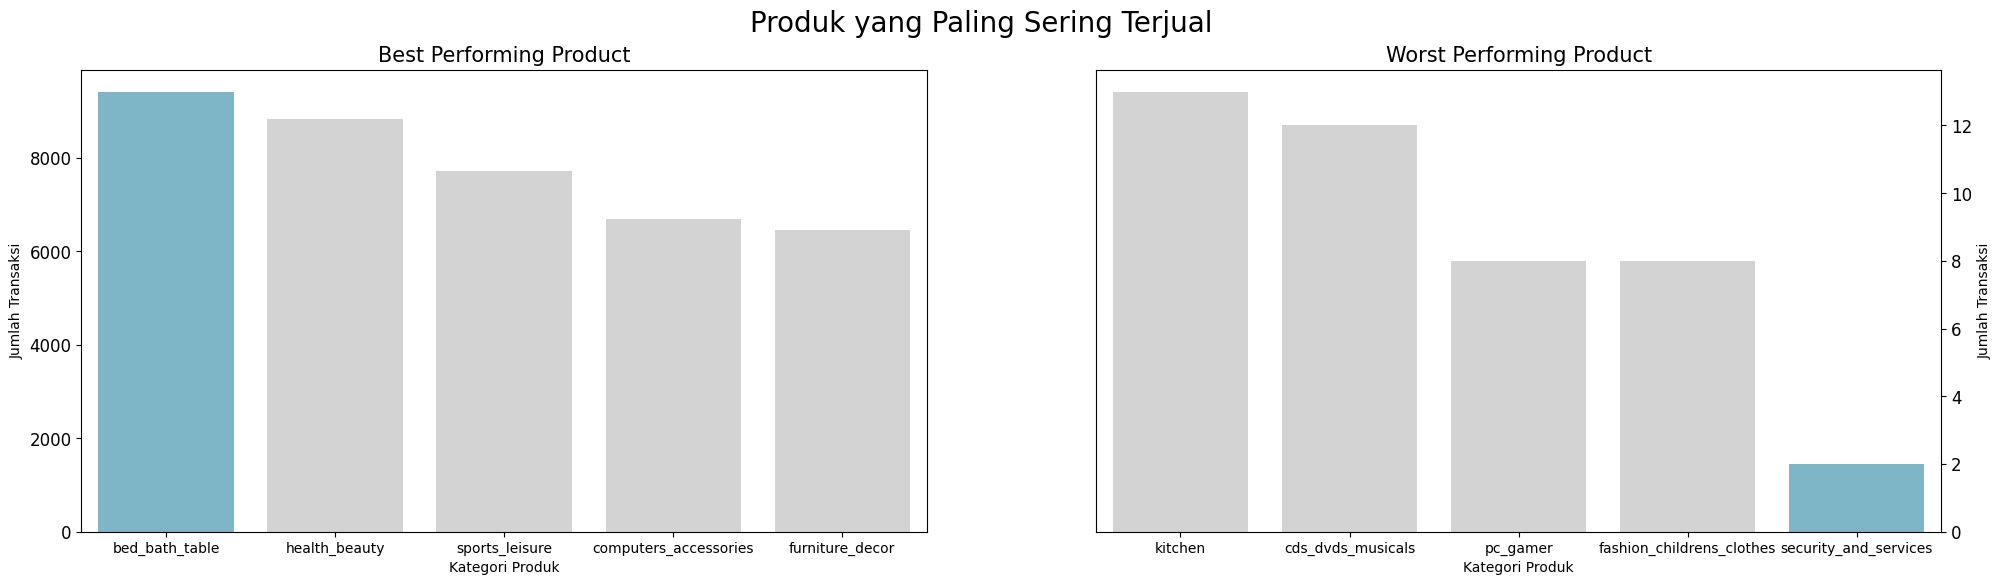

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y="order_id", x="product_category_name", data=df_product_category_count_by_order.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel("Jumlah Transaksi")
ax[0].set_xlabel("Kategori Produk")
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(y="order_id", x="product_category_name", data=df_product_category_count_by_order.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel("Jumlah Transaksi")
ax[1].set_xlabel("Kategori Produk")
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Produk yang Paling Sering Terjual", fontsize=20)
plt.show()

### Pertanyaan 2: Produk apa yang pernah terjual dengan nilai tertinggi?

In [47]:
df_product_category_payment_value = df.groupby('product_category_name')['payment_value'].sum().sort_values(ascending=False).reset_index()
print(df_product_category_payment_value)

        product_category_name  payment_value
0              bed_bath_table     1712553.67
1               health_beauty     1657373.12
2       computers_accessories     1585330.45
3             furniture_decor     1430176.39
4               watches_gifts     1429216.68
..                        ...            ...
69                   pc_gamer        2174.43
70             home_comfort_2        1710.54
71          cds_dvds_musicals        1199.43
72  fashion_childrens_clothes         785.67
73      security_and_services         324.51

[74 rows x 2 columns]


<ipython-input-48-798a0f4a3be2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="payment_value", x="product_category_name", data=df_product_category_payment_value.head(5), palette=colors, ax=ax[0])
<ipython-input-48-798a0f4a3be2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="payment_value", x="product_category_name", data=df_product_category_payment_value.sort_values(by="payment_value", ascending=True).head(5), palette=colors, ax=ax[1])


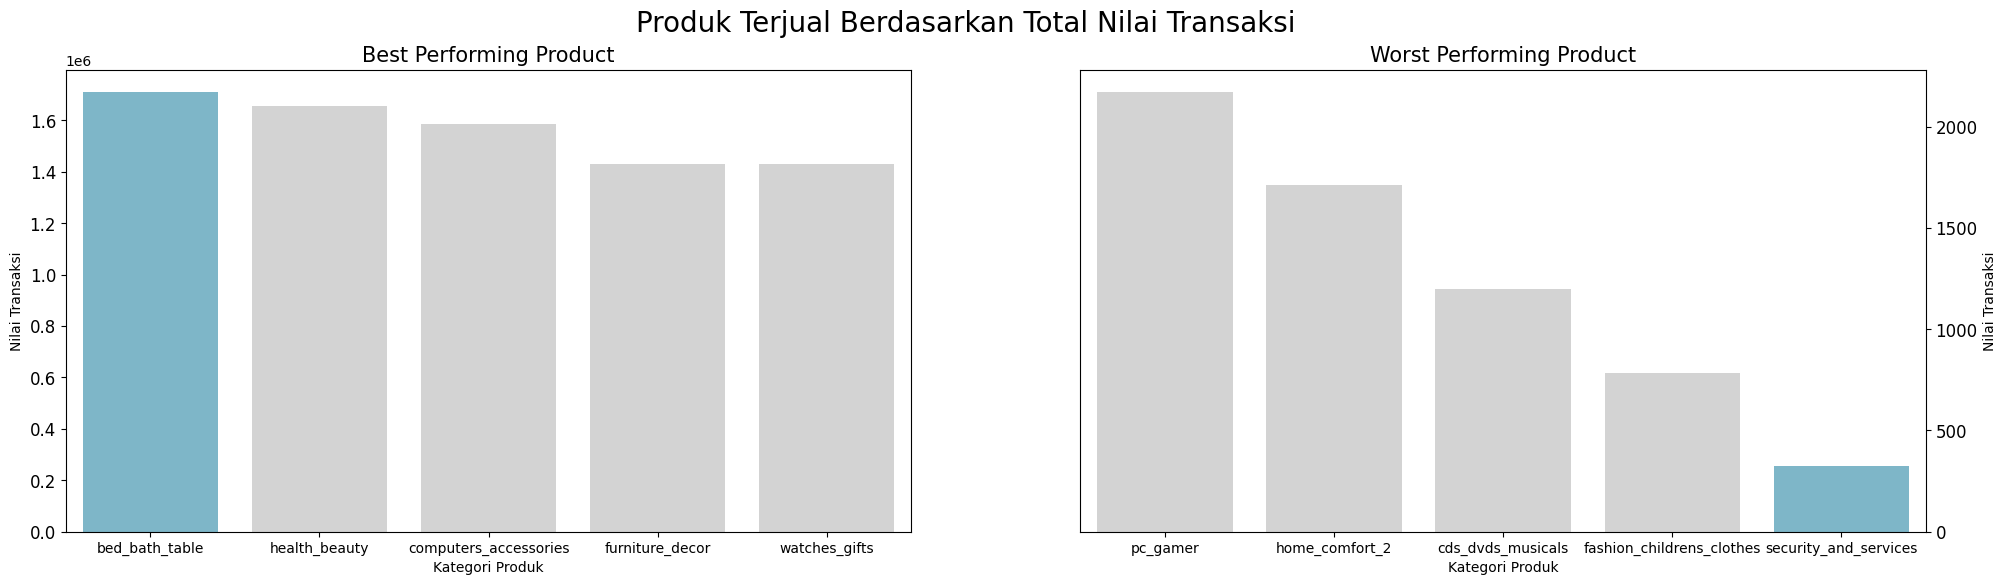

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y="payment_value", x="product_category_name", data=df_product_category_payment_value.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel("Nilai Transaksi")
ax[0].set_xlabel("Kategori Produk")
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(y="payment_value", x="product_category_name", data=df_product_category_payment_value.sort_values(by="payment_value", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel("Nilai Transaksi")
ax[1].set_xlabel("Kategori Produk")
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Produk Terjual Berdasarkan Total Nilai Transaksi", fontsize=20)
plt.show()

### Pertanyaan 3: Apa kata-kata yang paling sering muncul pada review?

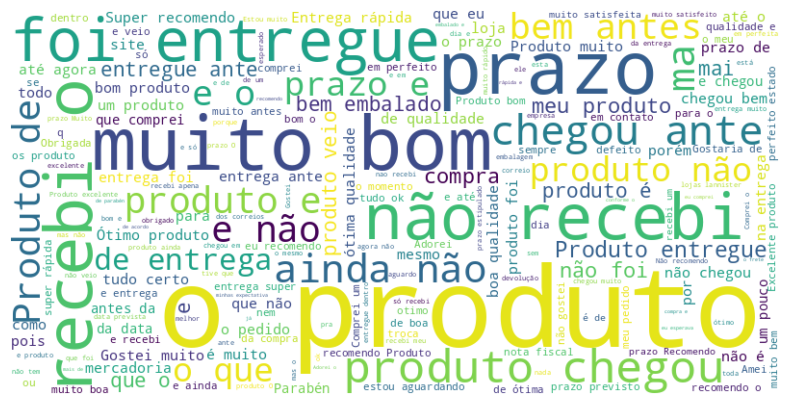

In [49]:
# Menggabungkan semua komentar review dari kolom 'review_comment_message'
text = ' '.join(order_reviews_df['review_comment_message'].dropna())

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan word cloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menonaktifkan sumbu
plt.show()


### Pertanyaan 4: Bagaimana persebaran lokasi geografis pembeli?

<ipython-input-50-16b442239d4e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="total_customers", x="customer_state", data=df_customer_state.head(5), palette=colors, ax=axes[0,0])
<ipython-input-50-16b442239d4e>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="total_customers", x="customer_state", data=df_customer_state.sort_values(by="total_customers", ascending=False).tail(5), palette=colors2, ax=axes[0,1])
<ipython-input-50-16b442239d4e>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="total_customers", x="customer_city", dat

Text(0.5, 1.0, 'City dengan customer paling sedikit')

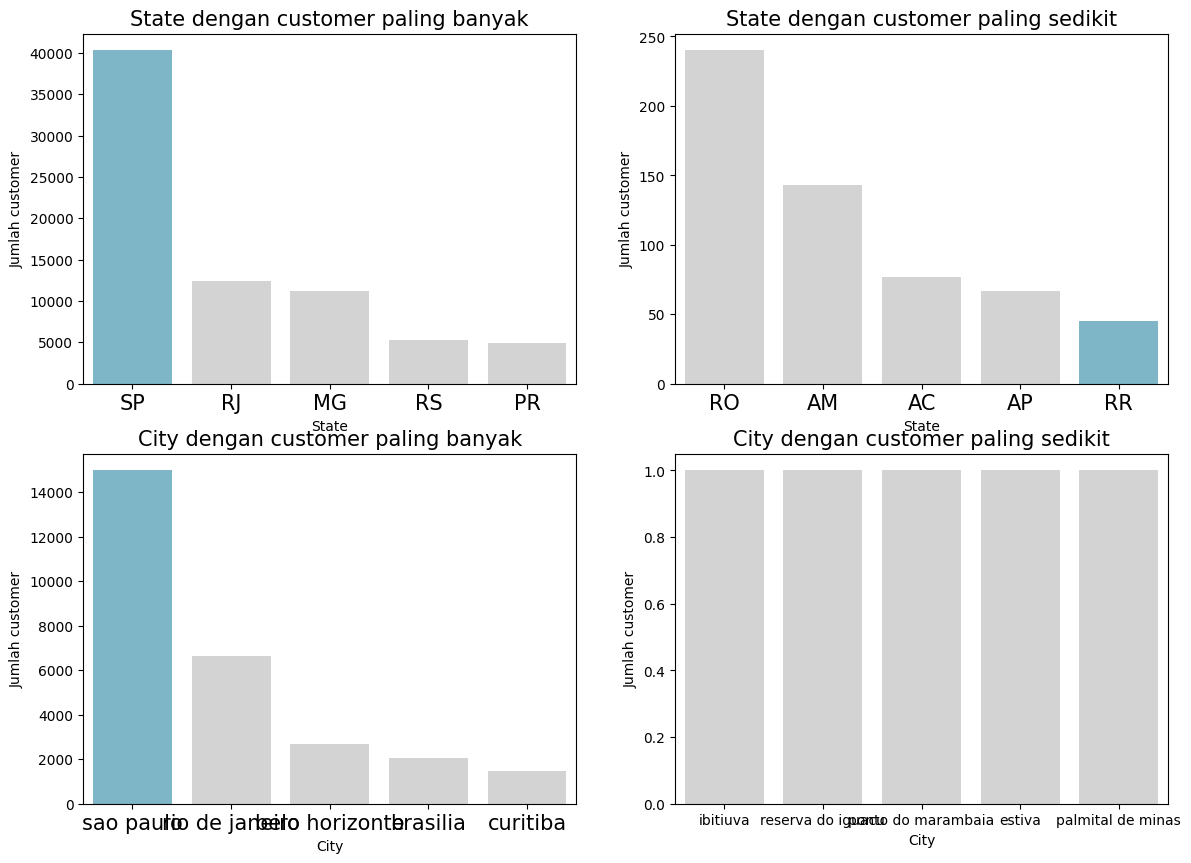

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
colors2 = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"]
colors3 = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]


df_customer_state = df.groupby('customer_state').agg(
    total_payment_value=('payment_value', 'sum'),  # Total pembayaran per state
    total_orders=('order_id', 'count'),  # Jumlah pesanan per state
    total_customers=('customer_unique_id', 'nunique'),  # Jumlah pelanggan unik per state
    average_payment_value=('payment_value', 'mean'),  # Rata-rata pembayaran per order
).sort_values(by='total_payment_value', ascending=False).reset_index()

sns.barplot(y="total_customers", x="customer_state", data=df_customer_state.head(5), palette=colors, ax=axes[0,0])
axes[0, 0].set_ylabel("Jumlah customer")
axes[0, 0].set_xlabel("State")
axes[0, 0].set_title("State dengan customer paling banyak", loc="center", fontsize=15)
axes[0, 0].tick_params(axis='x', labelsize=15)


sns.barplot(y="total_customers", x="customer_state", data=df_customer_state.sort_values(by="total_customers", ascending=False).tail(5), palette=colors2, ax=axes[0,1])
axes[0, 1].set_ylabel("Jumlah customer")
axes[0, 1].set_xlabel("State")
axes[0, 1].set_title("State dengan customer paling sedikit", loc="center", fontsize=15)
axes[0, 1].tick_params(axis='x', labelsize=15)


df_customer_city = df.groupby('customer_city').agg(
    total_payment_value=('payment_value', 'sum'),  # Total pembayaran per state
    total_orders=('order_id', 'count'),  # Jumlah pesanan per state
    total_customers=('customer_unique_id', 'nunique'),  # Jumlah pelanggan unik per state
    average_payment_value=('payment_value', 'mean'),  # Rata-rata pembayaran per order
).sort_values(by='total_payment_value', ascending=False).reset_index()

sns.barplot(y="total_customers", x="customer_city", data=df_customer_city.head(5), palette=colors, ax=axes[1,0])
axes[1, 0].set_ylabel("Jumlah customer")
axes[1, 0].set_xlabel("City")
axes[1, 0].set_title("City dengan customer paling banyak", loc="center", fontsize=15)
axes[1, 0].tick_params(axis='x', labelsize=15)

sns.barplot(y="total_customers", x="customer_city", data=df_customer_city.sort_values(by="total_customers", ascending=False).tail(5), palette=colors3, ax=axes[1,1])
axes[1, 1].set_ylabel("Jumlah customer")
axes[1, 1].set_xlabel("City")
axes[1, 1].set_title("City dengan customer paling sedikit", loc="center", fontsize=15)

### Pertanyaan 5: Bagaimana tren penjualan dari waktu ke waktu?

In [51]:
df.head()

,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_actual_vs_estimated,id
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,
2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-8,1
2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-8,1
2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-8,1
2018-07-24 20:41:37,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,...,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-6,2
2018-08-08 08:38:49,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,...,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-18,3


In [52]:
# # Memastikan 'order_purchase_timestamp' adalah tipe datetime
# # df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# # Mengatur indeks DataFrame ke kolom 'order_purchase_timestamp'
# # df.set_index('order_purchase_timestamp', inplace=True)

# # 1. **Distribusi Order per Waktu (per bulan)**
# orders_per_month = df.resample('M').size()

# # 2. **Tren Penjualan per Bulan**
# # Menjumlahkan 'payment_value' per bulan
# sales_per_month = df['payment_value'].resample('M').sum()

# # 3. **Waktu Pengiriman vs Estimasi**
# # Menghitung perbedaan antara pengiriman aktual dan estimasi
# df['delivery_actual_vs_estimated'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

# # Menghitung rata-rata per bulan
# delivery_vs_estimated = df['delivery_actual_vs_estimated'].resample('M').mean()

# # 4. **Status Order per Waktu**
# # Membandingkan status order per bulan
# order_status_per_month = df.groupby([pd.Grouper(freq='M'), 'order_status']).size().unstack().fillna(0)

# # Visualisasi
# fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# # Plot 1: Distribusi Order per Bulan
# axes[0, 0].plot(orders_per_month, color='b', label='Jumlah Order')
# axes[0, 0].set_title('Distribusi Order per Bulan')
# axes[0, 0].set_xlabel('Bulan')
# axes[0, 0].set_ylabel('Jumlah Order')

# # Plot 2: Tren Penjualan per Bulan
# axes[0, 1].plot(sales_per_month, color='g', label='Total Penjualan (payment_value)')
# axes[0, 1].set_title('Tren Penjualan per Bulan')
# axes[0, 1].set_xlabel('Bulan')
# axes[0, 1].set_ylabel('Total Penjualan')

# # Plot 3: Waktu Pengiriman vs Estimasi
# axes[1, 0].plot(delivery_vs_estimated, color='r', label='Waktu Pengiriman vs Estimasi')
# axes[1, 0].set_title('Waktu Pengiriman vs Estimasi (rata-rata per bulan)')
# axes[1, 0].set_xlabel('Bulan')
# axes[1, 0].set_ylabel('Hari')

# # Plot 4: Status Order per Bulan
# order_status_per_month.plot(kind='bar', stacked=True, ax=axes[1, 1], color=['gray', 'green', 'blue', 'orange', 'black', 'yellow', 'red', 'pink'])
# axes[1, 1].set_title('Status Order per Bulan')
# axes[1, 1].set_xlabel('Bulan')
# axes[1, 1].set_ylabel('Jumlah Order')

# # Menampilkan semua plot
# plt.tight_layout()
# plt.show()

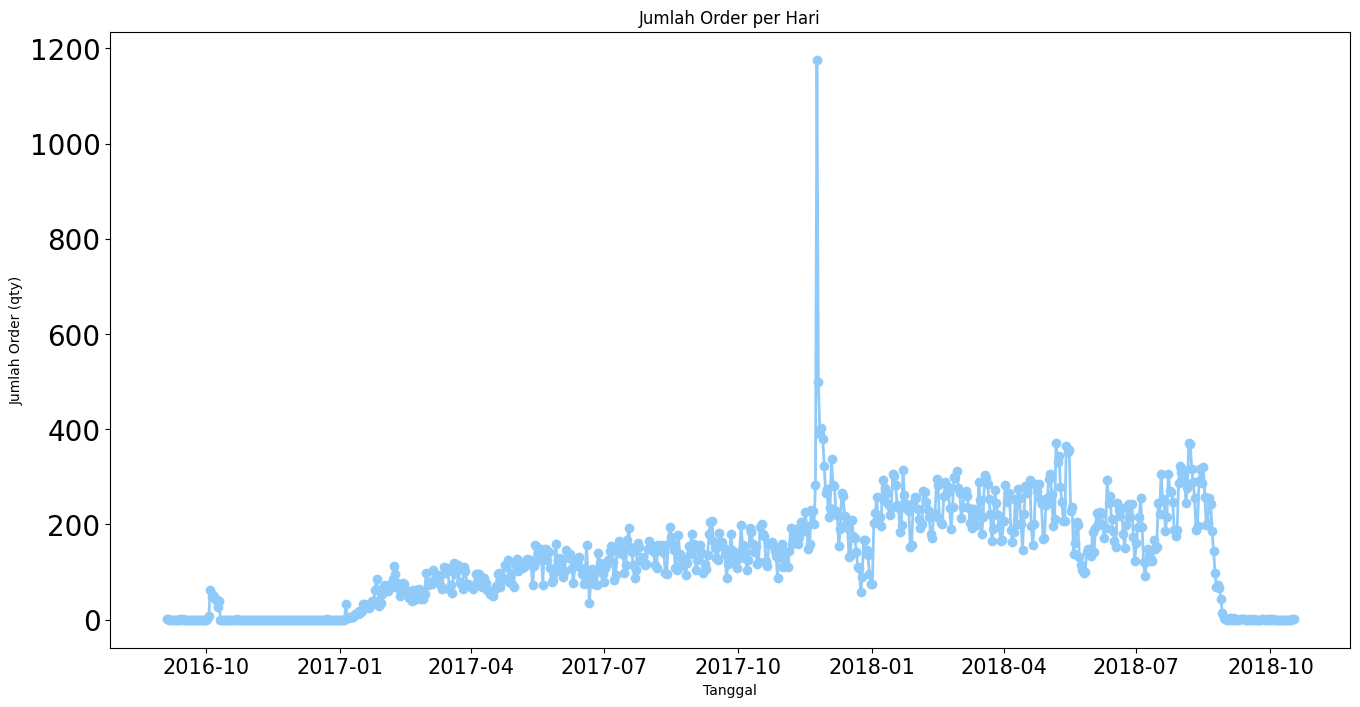

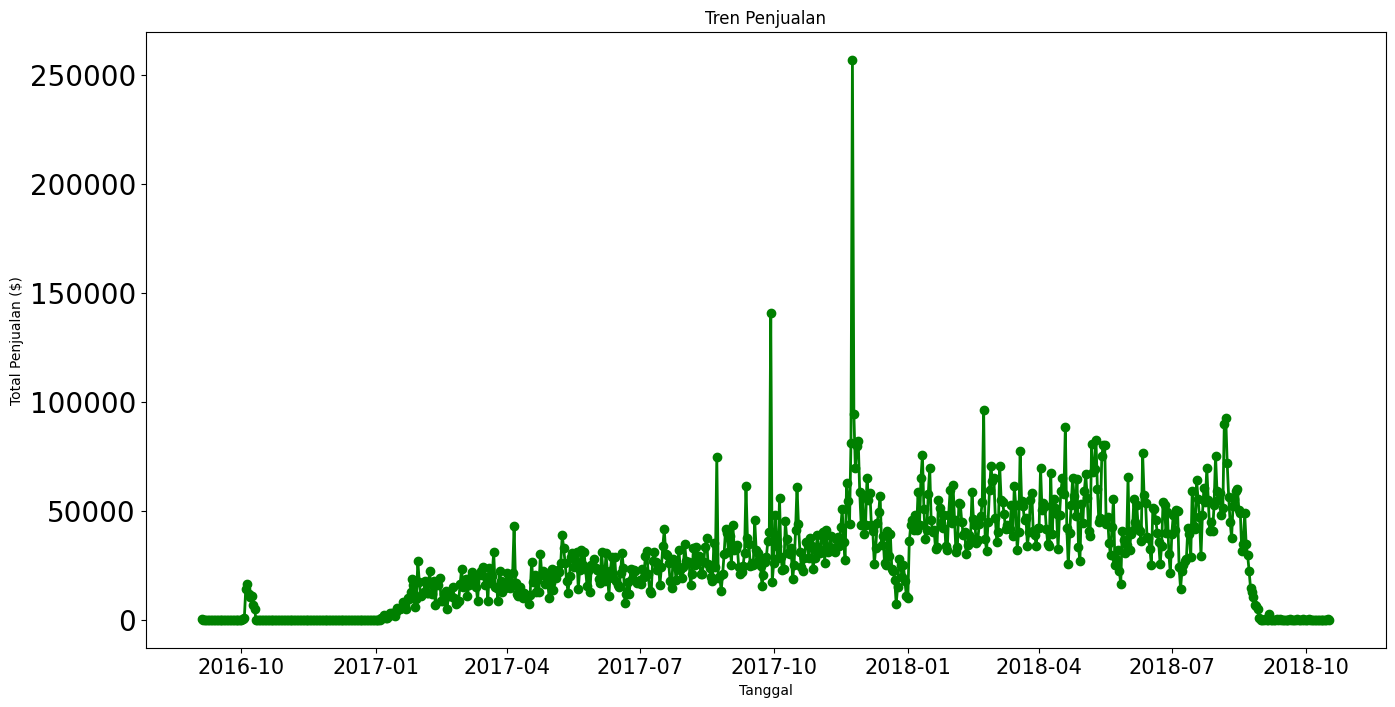

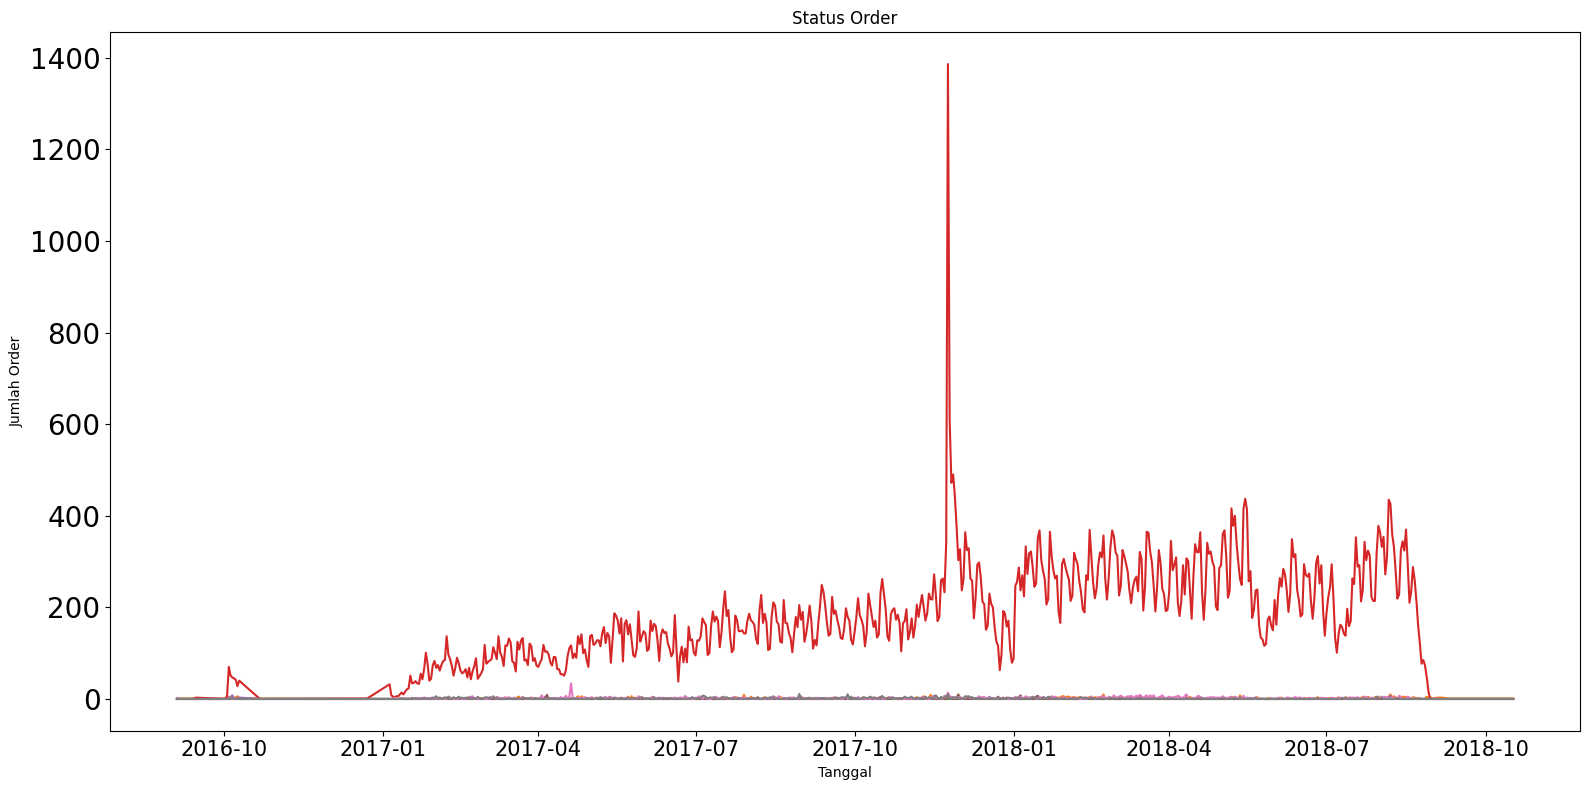

In [53]:
df = df.sort_index()

orders_per_day = df['order_id'].resample('D').nunique()
sales_per_day = df['payment_value'].resample('D').sum()
order_status_per_day = df.groupby([pd.Grouper(freq='D'), 'order_status']).size().unstack().fillna(0)

# Plot 1: Distribusi Order per Bulan
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    orders_per_day,
    marker='o',
    linewidth=2,
    color="#90CAF9",
    label="Jumlah Order"
)
ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Order (qty)")
ax.set_title("Jumlah Order per Hari")
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)

# Plot 2: Tren Penjualan Per Bulan

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    sales_per_day,
    marker='o',
    linewidth=2,
    color="g",
    label="Total Penjualan (payment value)"
)
ax.set_xlabel("Tanggal")
ax.set_ylabel("Total Penjualan ($)")
ax.set_title("Tren Penjualan")
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)


# Plot 3: Status Order per Bulan

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    order_status_per_day,
    # kind="bar",
    # stacked=True,
    # color=['gray', 'green', 'blue', 'orange', 'black', 'yellow', 'red', 'pink'],
    label="Status Order per Bulan"
)
ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Order")
ax.set_title("Status Order")
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)

plt.tight_layout()
plt.show()

## Conclusion

1. Fokus pada Produk Unggulan dan Strategi Reposisi Kategori Tertinggal
Kategori "Bed bath table" menjadi produk dengan performa terbaik, baik dari sisi jumlah unit terjual maupun nilai transaksi. Hal ini menunjukkan bahwa kategori tersebut memiliki daya tarik kuat bagi pelanggan dan berpotensi besar untuk terus dikembangkan. Oleh karena itu, perusahaan disarankan untuk meningkatkan ketersediaan stok, memperbanyak variasi produk, serta memaksimalkan promosi berbasis testimoni positif pelanggan untuk memperkuat kepercayaan pasar. Sebaliknya, kategori "Security and services" yang memiliki tingkat penjualan paling rendah memerlukan evaluasi menyeluruh. Perusahaan perlu meninjau ulang pendekatan segmentasi pasar, mempertimbangkan penyediaan layanan trial atau jaminan, serta mengkomunikasikan nilai produk dengan cara yang lebih meyakinkan. Upaya reposisi kategori ini dapat membuka peluang pasar baru apabila dilakukan secara strategis.

2. Optimalisasi Strategi Harga dan Pemasaran Kategori Rendah Nilai
Selain unggul dalam volume, kategori "Bed bath table" juga mencatatkan nilai transaksi tertinggi, yang menunjukkan tingginya willingness to pay dari pelanggan terhadap produk dalam kategori ini. Untuk mempertahankan keunggulan tersebut, strategi seperti bundling produk, program loyalitas, atau promosi musiman dapat diterapkan guna mendorong nilai pembelian per transaksi. Sementara itu, rendahnya nilai transaksi pada kategori "Security and services" mengindikasikan adanya kendala dalam persepsi harga atau kepercayaan terhadap layanan tersebut. Untuk itu, perusahaan sebaiknya melakukan riset mendalam untuk memahami persepsi pelanggan dan mengadaptasi strategi harga, misalnya dengan menghadirkan paket layanan yang lebih fleksibel, diskon perkenalan, atau testimoni pengguna yang menonjolkan manfaat dan keamanan layanan ini.

3. Peningkatan Kualitas Pengalaman Pelanggan dan Layanan Operasional
Analisis kata-kata yang sering muncul dalam ulasan pelanggan menunjukkan adanya sejumlah masalah yang cukup konsisten, terutama terkait keterlambatan pengiriman dan ketidaksesuaian pesanan. Hal ini menunjukkan bahwa meskipun kualitas produk bisa jadi memuaskan, proses pemenuhan pesanan belum optimal. Untuk mengatasi hal ini, perusahaan perlu meningkatkan efisiensi logistik, termasuk memperkuat kerja sama dengan mitra pengiriman yang andal serta memastikan sistem pelacakan barang berjalan dengan baik. Selain itu, perlu adanya peningkatan sistem penanganan keluhan pelanggan secara cepat, responsif, dan empatik agar kepuasan pelanggan tetap terjaga dan kepercayaan tidak menurun.

4. Penyesuaian Strategi Berdasarkan Distribusi Geografis Pelanggan
Distribusi pelanggan yang didominasi oleh wilayah SP (São Paulo) menunjukkan bahwa area ini merupakan pasar utama dengan potensi yang besar. Oleh karena itu, perusahaan disarankan untuk memfokuskan upaya optimalisasi logistik di wilayah ini, seperti memperkuat jaringan distribusi lokal, meningkatkan kapasitas gudang, serta meluncurkan kampanye pemasaran regional yang lebih tertarget. Di sisi lain, wilayah dengan jumlah pelanggan yang sangat kecil seperti RR (Roraima) perlu dianalisis lebih lanjut untuk memahami hambatan pertumbuhan, baik dari sisi aksesibilitas, infrastruktur, maupun kurangnya promosi. Pendekatan berupa edukasi pasar, subsidi ongkos kirim, atau program promosi spesial berbasis wilayah dapat menjadi langkah awal untuk meningkatkan penetrasi di area tersebut.

5. Memanfaatkan Tren Penjualan Positif untuk Pertumbuhan Jangka Panjang
Adanya tren peningkatan penjualan dari waktu ke waktu merupakan sinyal positif yang menunjukkan respons pasar terhadap strategi yang telah dijalankan. Untuk mempertahankan momentum ini, perusahaan perlu menyusun strategi pertumbuhan jangka panjang yang berkelanjutan, seperti menghadirkan program loyalitas pelanggan, sistem referral, serta kampanye musiman yang terjadwal. Selain itu, analisis terhadap pola tren penjualan juga penting dilakukan untuk mengidentifikasi periode penjualan tertinggi sehingga perusahaan dapat mempersiapkan stok, tenaga kerja, dan kampanye promosi secara lebih tepat. Pemanfaatan data historis untuk prediksi tren ke depan akan membantu perusahaan mengambil keputusan strategis yang lebih akurat dan responsif terhadap dinamika pasar.



In [55]:
# merge order review
# df = pd.merge(df, order_reviews_df)

# from google.colab import drive
# drive.mount('/content/drive')
# df.to_csv('/content/drive/My Drive/all_data.csv', index=False)